# Doubles Différences: La qualité de l'air est-elle importante ? Preuves issues du marché immobilier

Ce document va reproduire les résultats principaux de [Chay and Greenstone (2005)](https://www.jstor.org/stable/10.1086/427462).

**Aperçu :**
Nous n’allons pas reproduire l’ensemble de l’article, mais simplement explorer l’effet du CAA (Clean Air Act) sur la pollution de l’air en utilisant la méthode des différences en différences.

**Contexte :** Le Clean Air Act est une loi fédérale des États-Unis promulguée en 1970 afin de réguler les émissions atmosphériques provenant de sources fixes et mobiles. La loi vise à protéger la santé humaine et l’environnement en établissant des normes nationales de qualité de l’air et en fixant des limites à la quantité de polluants pouvant être rejetés dans l’atmosphère. Il est important de noter qu’il existe un seuil clair : les comtés traités sont ceux dont la moyenne annuelle de particules totales en suspension dépasse 75 $\mu 𝑔/𝑚^3$ ou dont la deuxième concentration journalière la plus élevée dépasse 260 $\mu 𝑔/𝑚^3$. La principale limitation réside dans l’impossibilité de tester l’hypothèse des tendances parallèles et de trouver un bon groupe de contrôle.








## 1. Sélection des variables
- **résultat :** Concentration de TSP
- **variable explicative :** Clean Air Act
- **hétérogénéité :** Avant/Au-dessus du seuil de traitement en 1970

## 2. Sélection de l’échantillon
Nous disposons d’un ensemble de données en panel avec la valeur moyenne pour les régions de contrôle ou traitées de 1967 à 1975.

Liste des principales variables :
- *year*
- *tsp:* Particules totales en suspension en $\mu 𝑔/𝑚^3$
- *treated:* 1 pour les observations traitées, 0 sinon
- *post:* 1 pour la période postérieure, 0 sinon

In [ ]:
# se connecter au drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Charger des bibliothèques supplémentaires si nécessaire

#!pip install linearmodels
#!pip install stargazer

In [ ]:
# Importation des bibliothèques nécessaires pour l’analyse de données et l’économétrie

# Pandas : pour la manipulation et l’analyse de données (DataFrames, séries temporelles, etc.)
import pandas as pd

# Matplotlib : pour créer des visualisations (graphiques en lignes, barres, etc.)
import matplotlib.pyplot as plt

# Skew (de scipy.stats) : pour calculer l’asymétrie (skewness) d’une distribution
from scipy.stats import skew

# Seaborn : bibliothèque de visualisation basée sur matplotlib, avec un style plus esthétique et des fonctions statistiques intégrées
import seaborn as sns

# NumPy : pour les calculs numériques et la gestion de tableaux de données (vecteurs, matrices, etc.)
import numpy as np

# Linearmodels : bibliothèque spécialisée dans l’estimation de modèles économétriques pour données de panel
import linearmodels as lm
from linearmodels import PanelOLS  # Pour estimer les modèles de régression de type effets fixes / panel
from linearmodels.panel import generate_panel_data  # Fonction pour générer des données de panel simulées

# Statsmodels : bibliothèque pour estimer des modèles statistiques (ex. : régressions, séries temporelles)
import statsmodels.formula.api as smf  # Interface de type R pour spécifier les formules de régression

# Stargazer : pour générer des tableaux de résultats de régressions (au format LaTeX ou HTML), similaire à l’outil éponyme de Stata
from stargazer.stargazer import Stargazer

# Module OS : permet d'interagir avec le système d'exploitation (par exemple, pour gérer les chemins de fichiers)
import os

In [ ]:
# Changer de "directory"
os.chdir('drive/My Drive/# REMPLACEZ-CETTE-PARTIE-PAR-LE-CHEMIN-VERS-LE-DOSSIER-CONTENANT-VOS-DONNÉES')

In [ ]:
# Charger les données
df = pd.read_excel("./chay_greenstone_1.xlsx")

# Jeter un œil aux données
df

year   tsp  post  treated
0   1967  63.3     0        0
1   1968  60.0     0        0
2   1969  57.3     0        0
3   1970  58.8     0        0
4   1971  54.0     1        0
5   1972  53.5     1        0
6   1973  52.9     1        0
7   1974  49.1     1        0
8   1975  48.4     1        0
9   1967  98.0     0        1
10  1968  97.0     0        1
11  1969  92.1     0        1
12  1970  94.4     0        1
13  1971  89.1     1        1
14  1972  78.3     1        1
15  1973  73.9     1        1
16  1974  70.1     1        1
17  1975  66.9     1        1

**Remarque :** Il n'est pas nécessaire de nettoyer les données.

## 3. Analyse univariée
### 3.1 Particules totales en suspension
- Les particules totales en suspension (TSP) sont de minuscules particules solides ou liquides en suspension dans l’air ou dans l’eau. Ces particules peuvent prendre la forme de poussière, de fumée, de pollen ou d’autres polluants, et leur taille peut varier de 0,001 à 100 micromètres. Les TSP peuvent affecter la qualité de l’air et de l’eau, et elles peuvent aussi être inhalées par les humains et les animaux, ce qui peut potentiellement provoquer des problèmes de santé.

In [ ]:
# Regarder les statistiques descriptives de la variable tsp (particules totales en suspension)
df['tsp'].describe()

count    18.000000
mean     69.838889
std      17.507112
min      48.400000
25%      54.825000
50%      65.100000
75%      86.400000
max      98.000000
Name: tsp, dtype: float64

Skewness tsp: 
0.44550134836099775


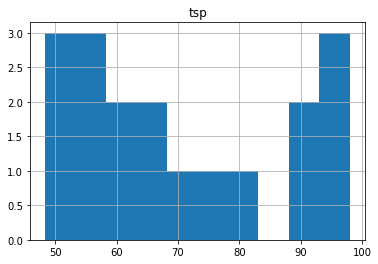

In [ ]:
# Histogramme et asymétrie
#   L'asymétrie est une mesure statistique qui décrit l'asymétrie d'une distribution
#   autour de sa moyenne — si les données sont biaisées à gauche (asymétrie négative) ou à droite
#   (asymétrie positive).

df.hist(column='tsp')

print("Skewness tsp: ")
print(skew(df['tsp'], nan_policy='omit'))

**Remarque :** Nous n’avons que 18 points de données.

## 4 Analyse bivariée
### 4.1 Figure 1

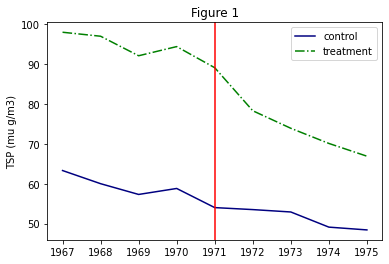

In [ ]:
# Tracer les tendances de TSP au fil du temps pour les groupes de contrôle et de traitement

# Tracer les données pour le groupe de contrôle (treated == 0)
# 'year' sur l'axe des x, 'tsp' sur l'axe des y, couleur bleue et ligne continue
plt.plot(df[(df['treated'] == 0)]['year'],  # x : année
         df[(df['treated'] == 0)]['tsp'],   # y : TSP
         color="navy",                      # Couleur de la ligne pour le groupe de contrôle
         linestyle='-',                     # Type de ligne (continue)
         label="control")                   # Légende pour le groupe de contrôle

# Tracer les données pour le groupe de traitement (treated == 1)
# 'year' sur l'axe des x, 'tsp' sur l'axe des y, couleur verte et ligne en tirets
plt.plot(df[(df['treated'] == 1)]['year'],  # x : année
         df[(df['treated'] == 1)]['tsp'],   # y : TSP
         color="green",                     # Couleur de la ligne pour le groupe de traitement
         linestyle='-.',                    # Type de ligne (tiret-point)
         label="treatment")                 # Légende pour le groupe de traitement

# Ajouter un titre au graphique
plt.title("Figure 1")

# Laisser l'axe des x sans étiquette
plt.xlabel("")

# Ajouter une étiquette à l'axe des y
plt.ylabel("TSP (μg/m³)")

# Ajouter une ligne verticale rouge à l'année 1971 (indiquant un changement de période)
plt.axvline(x=1971, ymin=0, ymax=100, color='red')  # Ligne verticale rouge à 1971

# Ajouter une légende pour distinguer les deux groupes
plt.legend()

## 5 Analyse multivariée
### 5.1 Modèle principal

In [ ]:
# Définir l'index pour les effets fixes dans un modèle de données de panel

# Créer une colonne 'id' qui représente l'unité transversale
# Ici, 'treated' est utilisé pour identifier les groupes (traité vs contrôle).
df['id'] = df['treated']

# Créer une colonne 't' représentant la variable temporelle (par exemple, l'année).
df['t'] = df['year']

# Réinitialiser l'index actuel afin de repartir d'une structure propre avant de définir un nouvel index
df.reset_index(inplace=True)

# Définir un index multi-niveaux avec 'id' (entité) et 't' (temps) pour les modèles de données de panel
df = df.set_index(['id', 't'])

In [ ]:
# Estimer un modèle de régression de type Différences-en-Différences avec des données de panel

# Définir et configurer le modèle de régression avec l'interface de formule.
# La variable dépendante est 'tsp', et la variable explicative clé est l'interaction 'treated*post',
# qui capture l'effet Diff-in-Diff. Le '+1' ajoute une constante (intercept) au modèle.
reg1 = PanelOLS.from_formula("tsp ~ treated*post + 1", df)

# Estimer le modèle en ajustant les erreurs standards en les regroupant (clustered) pour corriger les hétéroscédasticités
# par défaut, les erreurs sont regroupées au niveau de l'entité
res = reg1.fit(cov_type='clustered')

# Afficher les résultats de la régression
res


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                    tsp   R-squared:                        0.9296
Estimator:                   PanelOLS   R-squared (Between):              1.0000
No. Observations:                  18   R-squared (Within):               0.7348
Date:                Mon, Jan 09 2023   R-squared (Overall):              0.9296
Time:                        13:32:25   Log-likelihood                   -52.667
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      61.654
Entities:                           2   P-value                           0.0000
Avg Obs:                       9.0000   Distribution:                    F(3,14)
Min Obs:                       9.0000                                           
Max Obs:                       9.0000   F-statistic (robust):             225.39
                                        P-value                           0.0000
Time periods:                       9   Distribution:                    F(3,14)
Avg Obs:                       2.0000                                           
Min Obs:                       2.0000                                           
Max Obs:                       2.0000                                           
                                                                                
                              Parameter Estimates                               
================================================================================
              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------
Intercept        59.850     1.2527     47.775     0.0000      57.163      62.537
post            -8.2700     1.7280    -4.7858     0.0003     -11.976     -4.5637
treated          35.525     1.8093     19.635     0.0000      31.644      39.406
post:treated    -11.445     4.4759    -2.5570     0.0228     -21.045     -1.8450
================================================================================


PanelEffectsResults, id: 0x274cce6f070

### 5.2 Tendances parallèles (pré-traitement)

In [ ]:
# Créer un échantillon placebo pour tester les tendances pré-traitement (tests de faux positifs)

# Sélectionner les données pour les années jusqu'à et y compris 1971 (exclure les années après 1971)
# Cela permet de simuler un test placebo sans prendre en compte la période post-traitement réelle.
df_placebo = df.loc[df['year'] <= 1971, :]

# Définir manuellement une période "post" fictive à partir de 1970 (deux ans avant le traitement réel en 1971)
# Cela permet de tester si un effet significatif apparaît *avant* le traitement réel — un test des pré-tendances.
df_placebo.loc[df_placebo['year'] > 1969, 'post'] = 1  # Définir 'post' = 1 pour les années 1970 et 1971

# Afficher l'échantillon placebo
df_placebo

index  year   tsp  post  treated
id t                                     
0  1967      0  1967  63.3     0        0
   1968      1  1968  60.0     0        0
   1969      2  1969  57.3     0        0
   1970      3  1970  58.8     1        0
   1971      4  1971  54.0     1        0
1  1967      9  1967  98.0     0        1
   1968     10  1968  97.0     0        1
   1969     11  1969  92.1     0        1
   1970     12  1970  94.4     1        1
   1971     13  1971  89.1     1        1

In [ ]:
reg2 = PanelOLS.from_formula("tsp ~ treated*post+1", df_placebo)
res = reg2.fit(cov_type = 'clustered')

res

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                    tsp   R-squared:                        0.9804
Estimator:                   PanelOLS   R-squared (Between):              1.0000
No. Observations:                  10   R-squared (Within):               0.3619
Date:                Mon, Jan 09 2023   R-squared (Overall):              0.9804
Time:                        13:32:26   Log-likelihood                   -23.437
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      99.930
Entities:                           2   P-value                           0.0000
Avg Obs:                       5.0000   Distribution:                     F(3,6)
Min Obs:                       5.0000                                           
Max Obs:                       5.0000   F-statistic (robust):             100.51
                                        P-value                           0.0000
Time periods:                       5   Distribution:                     F(3,6)
Avg Obs:                       2.0000                                           
Min Obs:                       2.0000                                           
Max Obs:                       2.0000                                           
                                                                                
                              Parameter Estimates                               
================================================================================
              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------
Intercept        60.200     1.8288     32.918     0.0000      55.725      64.675
post            -3.8000     2.8538    -1.3315     0.2314     -10.783      3.1831
treated          35.500     2.6527     13.382     0.0000      29.009      41.991
post:treated    -0.1500     4.2058    -0.0357     0.9727     -10.441      10.141
================================================================================


PanelEffectsResults, id: 0x274cd811e50

In [ ]:
# Deuxième test placebo avec des années différentes pour tester les tendances pré-traitement

df_placebo = df.loc[df['year'] <= 1971,:]
df_placebo.loc[df_placebo['year'] >1968,'post'] = 1
df_placebo

reg3 = PanelOLS.from_formula("tsp ~ treated*post+1", df_placebo)
res = reg3.fit(cov_type = 'clustered')

res

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                    tsp   R-squared:                        0.9901
Estimator:                   PanelOLS   R-squared (Between):              1.0000
No. Observations:                  10   R-squared (Within):               0.6774
Date:                Mon, Jan 09 2023   R-squared (Overall):              0.9901
Time:                        13:32:26   Log-likelihood                   -20.026
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      199.65
Entities:                           2   P-value                           0.0000
Avg Obs:                       5.0000   Distribution:                     F(3,6)
Min Obs:                       5.0000                                           
Max Obs:                       5.0000   F-statistic (robust):             369.28
                                        P-value                           0.0000
Time periods:                       5   Distribution:                     F(3,6)
Avg Obs:                       2.0000                                           
Min Obs:                       2.0000                                           
Max Obs:                       2.0000                                           
                                                                                
                              Parameter Estimates                               
================================================================================
              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------
Intercept        61.650     1.5062     40.930     0.0000      57.964      65.336
post            -4.9500     2.1218    -2.3329     0.0584     -10.142      0.2419
treated          35.850     1.5739     22.778     0.0000      31.999      39.701
post:treated    -0.6833     2.7067    -0.2525     0.8091     -7.3065      5.9398
================================================================================


PanelEffectsResults, id: 0x274cd832f40

## 6. Conclusion
Il ne s’agit que d’un modèle simplifié. Cela dit, les résultats sont encourageants. Nous observons un effet statistiquement significatif de l’estimateur en différences en différences. De plus, aucun effet n’est constaté pour une période de pré-traitement placebo.